# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [22]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

          ┌──────────┐ ┌───┐ ░  ░ ┌───┐┌────────────┐┌─┐   
qr_0: |0>─┤ U1(pi/2) ├─┤ X ├─░──░─┤ X ├┤ U1(4.7124) ├┤M├───
         ┌┴──────────┴┐└─┬─┘ ░  ░ └─┬─┘└┬──────────┬┘└╥┘┌─┐
qr_1: |0>┤ U1(4.7124) ├──■───░──░───■───┤ U1(pi/2) ├──╫─┤M├
         └────────────┘      ░  ░       └──────────┘  ║ └╥┘
 cr_0: 0 ═════════════════════════════════════════════╩══╬═
                                                         ║ 
 cr_1: 0 ════════════════════════════════════════════════╩═
                                                           


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

          ┌──────────┐ ┌───┐ ░ ┌──────────┐ ░  ░ ┌────────────┐┌───┐»
qr_0: |0>─┤ U1(pi/2) ├─┤ X ├─░─┤0         ├─░──░─┤ U1(5.4978) ├┤ X ├»
         ┌┴──────────┴┐└─┬─┘ ░ │  unitary │ ░  ░ └────────────┘└─┬─┘»
qr_1: |0>┤ U1(4.7124) ├──■───░─┤1         ├─░──░─────────────────■──»
         └────────────┘      ░ └──────────┘ ░  ░                    »
 cr_0: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
 cr_1: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
«      ┌────────────┐┌─┐   
«qr_0: ┤ U1(5.4978) ├┤M├───
«      └┬──────────┬┘└╥┘┌─┐
«qr_1: ─┤ U1(pi/4) ├──╫─┤M├
«       └──────────┘  ║ └╥┘
«cr_0: ═══════════════╩══╬═
«                        ║ 
«cr_1: ══════════════════╩═
«                          


In [6]:
print (rb_cnotdihedral_X_circs[0][0])

         ┌───┐ ░  ┌──────────┐ ┌───┐ ░  ░ ┌───┐┌────────────┐ ░ ┌───┐┌─┐   
qr_0: |0>┤ H ├─░──┤ U1(pi/2) ├─┤ X ├─░──░─┤ X ├┤ U1(4.7124) ├─░─┤ H ├┤M├───
         ├───┤ ░ ┌┴──────────┴┐└─┬─┘ ░  ░ └─┬─┘└┬──────────┬┘ ░ ├───┤└╥┘┌─┐
qr_1: |0>┤ H ├─░─┤ U1(4.7124) ├──■───░──░───■───┤ U1(pi/2) ├──░─┤ H ├─╫─┤M├
         └───┘ ░ └────────────┘      ░  ░       └──────────┘  ░ └───┘ ║ └╥┘
 cr_0: 0 ═════════════════════════════════════════════════════════════╩══╬═
                                                                         ║ 
 cr_1: 0 ════════════════════════════════════════════════════════════════╩═
                                                                           


In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

         ┌───┐ ░  ┌──────────┐ ┌───┐ ░ ┌──────────┐ ░  ░ ┌────────────┐┌───┐»
qr_0: |0>┤ H ├─░──┤ U1(pi/2) ├─┤ X ├─░─┤0         ├─░──░─┤ U1(5.4978) ├┤ X ├»
         ├───┤ ░ ┌┴──────────┴┐└─┬─┘ ░ │  unitary │ ░  ░ └────────────┘└─┬─┘»
qr_1: |0>┤ H ├─░─┤ U1(4.7124) ├──■───░─┤1         ├─░──░─────────────────■──»
         └───┘ ░ └────────────┘      ░ └──────────┘ ░  ░                    »
 cr_0: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
 cr_1: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌────────────┐ ░ ┌───┐┌─┐   
«qr_0: ┤ U1(5.4978) ├─░─┤ H ├┤M├───
«      └┬──────────┬┘ ░ ├───┤└╥┘┌─┐
«qr_1: ─┤ U1(pi/4) ├──░─┤ H ├─╫─┤M├
«       └──────────┘  ░ └───┘ ║ └╥┘
«cr_0: ═══════════════════════╩══╬═
«                                ║ 
«cr_1: ══════════════════════════╩═
«         

### Add a depolarizing noise to the CS gate

In [8]:
### Add depolarizing error to "cs" gate

p1Q = 0.002
p2Q = 0.04

# Construct the error
cs_error = errors.depolarizing_error(p2Q/2, 2)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print(basis_gates)

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['cx', 'cs', 'u3']
  All-qubits errors: ['u3', 'cx', 'cs']
['cx', 'id', 'u3', 'unitary']


### Execute the RB sequences

In [9]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral X Circuits


In [10]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [11]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Z Circuits


In [12]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleved Z Circuits


### Fit the results

In [13]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [23]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.68845557, 0.92713392, 0.25040126]), 'params_err': array([0.02573173, 0.0038604 , 0.00264992]), 'epc': 0.05464955836157831, 'epc_err': 0.0031228470149681155}


In [24]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.73101175, 0.93507503, 0.23015801]), 'params_err': array([0.03656969, 0.00850779, 0.00475419]), 'epc': 0.04869372565453403, 'epc_err': 0.006823880117628161}


In [14]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [26]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.68960183, 0.91466517, 0.25407603]), 'params_err': array([0.0148677 , 0.00675638, 0.00353984]), 'epc': 0.06400111945307344, 'epc_err': 0.005540042062614662}


In [27]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.6848395 , 0.9144517 , 0.25317438]), 'params_err': array([0.02992725, 0.01090076, 0.00571352]), 'epc': 0.06416122795969367, 'epc_err': 0.008940408309272656}


In [15]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [17]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9334868104054095, 'alpha_err': 0.0073262880641521535, 'epg_est': 0.04988489219594289, 'epg_est_err': 0.0058862278361788345}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9144943916555072, 'alpha_err': 0.009650189093239017, 'epg_est': 0.06412920625836963, 'epg_est_err': 0.007914364359115397}


In [19]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))

Estimated gate error: 0.015259 (0.008240)


### Plot the results

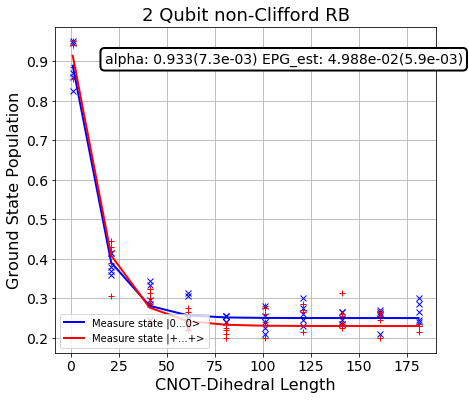

In [20]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

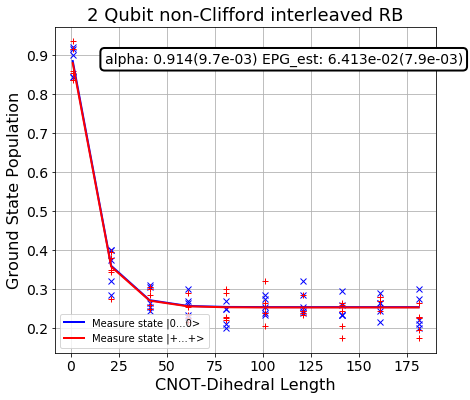

In [21]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()